# PCA - Principal Component Analysis

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#criando o DataFrame "df_chem" (e talvez outros DataFrames)
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,6,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
#df_chem, dados_categoricos

In [2]:
nome = 'df_chem'
atributos = ["Specific Gravity", "Mohs Hardness", "Dispersion", 'Molar Mass', 'Molar Volume', 'Calculated Density']
#target = ["Refractive Index"]
df_chem_r = df_chem.reindex(atributos, axis=1)


#### DataFrame fit normalização

In [3]:
sc = StandardScaler()
sc.fit(df_chem_r)
df_chem_norma = sc.transform(df_chem_r)

#### DataFrame fit PCA

In [4]:
pca = PCA()
pca.fit(df_chem_norma)
df_chem_pca = pca.transform(df_chem_norma)

#### Gráfico de PCA do DataFrame normalizado

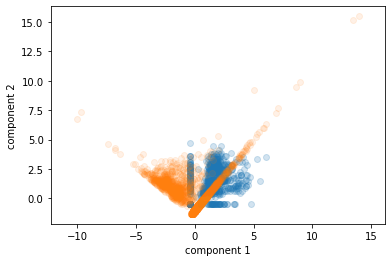

In [5]:
#X_new = pca.inverse_transform(X_pca)
plt.scatter(df_chem_norma[:, 0], df_chem_norma[:, 1], alpha=0.2)
#plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.1)
plt.scatter(df_chem_pca[:, 0], df_chem_pca[:, 1], alpha=0.1)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal');

#### Grafico PCA colorido

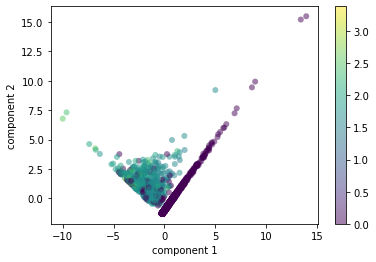

In [6]:
plt.scatter(df_chem_pca[:, 0], df_chem_pca[:, 1], edgecolor='none', alpha=0.5, c=df["Refractive Index"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

#### Grafico PCA colorido 3D

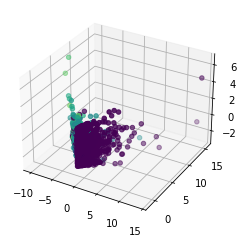

In [7]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_chem_pca[:, 0], df_chem_pca[:, 1], df_chem_pca[:, 2], c=df["Refractive Index"].values)

#### Componentes principais do sistema

In [8]:
component_names = [f"PC{i+1}" for i in range(df_chem_pca.shape[1])]
df_chem_pca = pd.DataFrame(df_chem_pca, columns=component_names)
df_chem_pca.head()

loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=df_chem_r.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Specific Gravity,-0.525068,0.429420,0.037552,-0.194151,-0.705901,0.050014
Mohs Hardness,-0.517484,0.437284,-0.049572,-0.208024,0.702142,-0.047522
Dispersion,-0.217377,0.179460,0.163441,0.945204,0.019907,0.004522
Molar Mass,0.458105,0.531868,0.264557,-0.045699,0.056013,0.657298
Molar Volume,0.446349,0.554791,-0.232331,0.042008,-0.065047,-0.658032
Calculated Density,0.013158,-0.038710,0.919484,-0.147536,0.030593,-0.360796


#### Gráfico de Variância dos Dados

array([<AxesSubplot:title={'center':'Variancia explicada'}, xlabel='Componente'>,
       <AxesSubplot:title={'center':'Variância acumulada'}, xlabel='Componente'>],
      dtype=object)

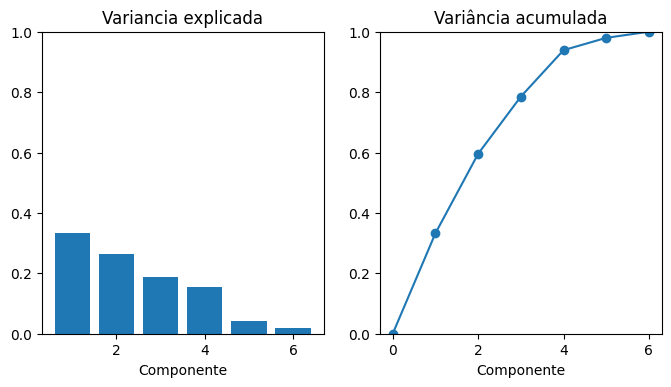

In [9]:
def plot_variance(pca, width=8, dpi=100):
    # Criar figura
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Fazer o cálculo da variância explicada
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Componente", 
        title="Variancia explicada", 
        ylim=(0.0, 1.0)
    )
    
    # Variância acumulada
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Componente", 
        title="Variância acumulada", 
        ylim=(0.0, 1.0)
    )
    
    # Detalhes da figura
    fig.set(figwidth=8, dpi=100)
    return axs

# Graficar
plot_variance(pca)


#### Componentes Importantes do Sistema:

É interessante utilizar até o PC4. Analisando o gráfico de variância acumulada, nota-se que a partir do PC4, não há um ganho significativo de dados (em até PC4 tem-se valor acumulado próximo de 100% dos dados) e sabendo que uma dimensão extra custa poder computacional, é interessante pegar apenas até PC4.

In [10]:
### testar a floresta aleatóriacom PCA ?????